# Code to classification by Matteo

# Data Work

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")
df = df.drop(columns=["loan_id"])
df.columns = df.columns.str.strip()
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [3]:
df["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [4]:
print("baseline accuracy rate = ", 2565/(2656+1613))

baseline accuracy rate =  0.600843288826423


In [5]:
df["loan_status"] = df["loan_status"].str.strip().map({'Rejected': 0, 'Approved': 1})

In [6]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [7]:
# Identify numeric and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

In [8]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [9]:
# Split before scaling with stratification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Scale only numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# KNN Classifier

KNN Cross-Validation Scores:
k=10: Mean CV Accuracy = 0.9107
k=20: Mean CV Accuracy = 0.9180
k=30: Mean CV Accuracy = 0.9250
k=40: Mean CV Accuracy = 0.9256
k=50: Mean CV Accuracy = 0.9245
k=60: Mean CV Accuracy = 0.9239
k=70: Mean CV Accuracy = 0.9198
k=80: Mean CV Accuracy = 0.9212
k=90: Mean CV Accuracy = 0.9206
k=100: Mean CV Accuracy = 0.9195
Best KNN Accuracy from CV: 0.9262 with k = 38


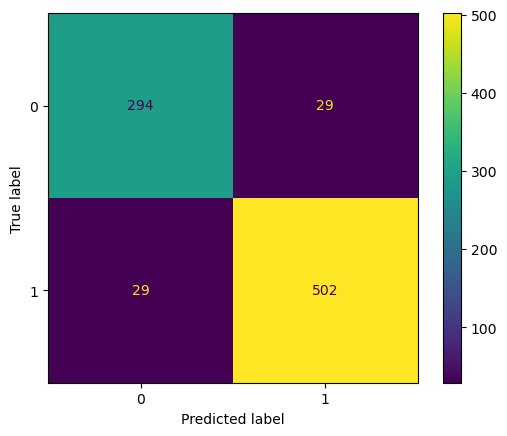

In [11]:
# KNN CV on processed training data
best_k = 1
best_cv_acc = 0
print("KNN Cross-Validation Scores:")

for k in range(1, 101):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if k % 10 == 0:
        print(f"k={k}: Mean CV Accuracy = {mean_score:.4f}")
    if mean_score > best_cv_acc:
        best_cv_acc = mean_score
        best_k = k

print(f"Best KNN Accuracy from CV: {best_cv_acc:.4f} with k = {best_k}")

# Train best KNN model on full training data
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on test data
y_pred = knn_best.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Logistic regression

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       323
           1       0.92      0.94      0.93       531

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:


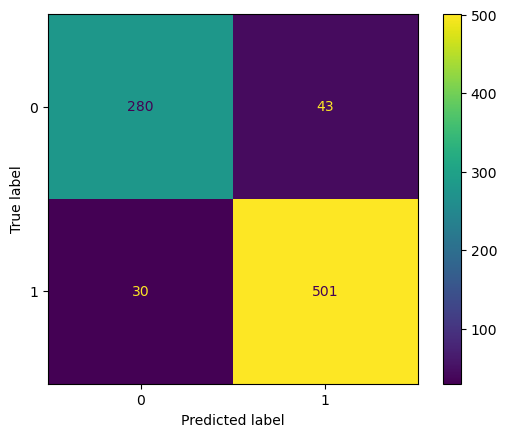

In [12]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


Overall Accuracy: 0.9145
